In [145]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
img = cv2.imread('test_images/test12.jpg') 
print(img.shape)
print(img.dtype)

(720L, 1280L, 3L)
uint8


In [19]:
def xy_to_scale(x,y):
    dist_from_center = np.sqrt((x - 1280/2)**2 + (y - 720/2)**2)
    min_dist = 0
    max_dist = np.sqrt((1279 - 1280/2)**2 + (719 - 720/2)**2)
    scale_min = 0.00
    scale_max = 2.80 #3
    scale = ((dist_from_center - min_dist)*(scale_max - scale_min)/(max_dist - min_dist)) + scale_min
    return scale
def xy_to_radius(x,y):
    dist_from_center = np.sqrt((x - 1280/2)**2 + (y - 720/2)**2)
    radius = dist_from_center
    return radius

In [157]:
x_l = np.linspace(1280/2, 1280, 5, False)
y_l = np.linspace(720/2, 720, 5, False)

scales = xy_to_scale(x,y)
radii = xy_to_radius(x,y)
print(scales[1:])
print(radii[1:])

[ 0.56104043  1.12208086  1.68312129  2.24416172]
[ 146.86047801  293.72095601  440.58143402  587.44191202]


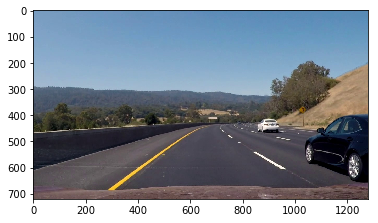

In [30]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

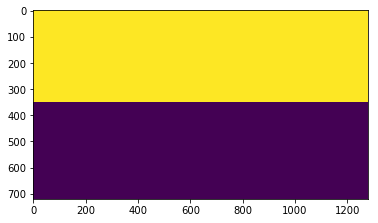

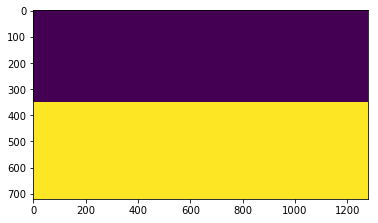

In [100]:
mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
mask[0:350, :] = 255
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask)
plt.show()
plt.imshow(mask_inv)
plt.show()

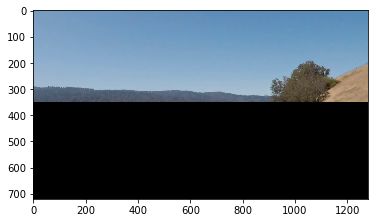

In [118]:
masked_img = cv2.bitwise_or(img, img,mask = mask)
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))

(0.0, 0.0)
(0.40074316390137965, 104.90034143249042)
(0.8014863278027593, 209.80068286498084)
(1.2022294917041381, 314.70102429747106)
(1.6029726556055186, 419.60136572996169)
(2.0037158195068971, 524.50170716245191)
(2.4044589834082766, 629.40204859494224)


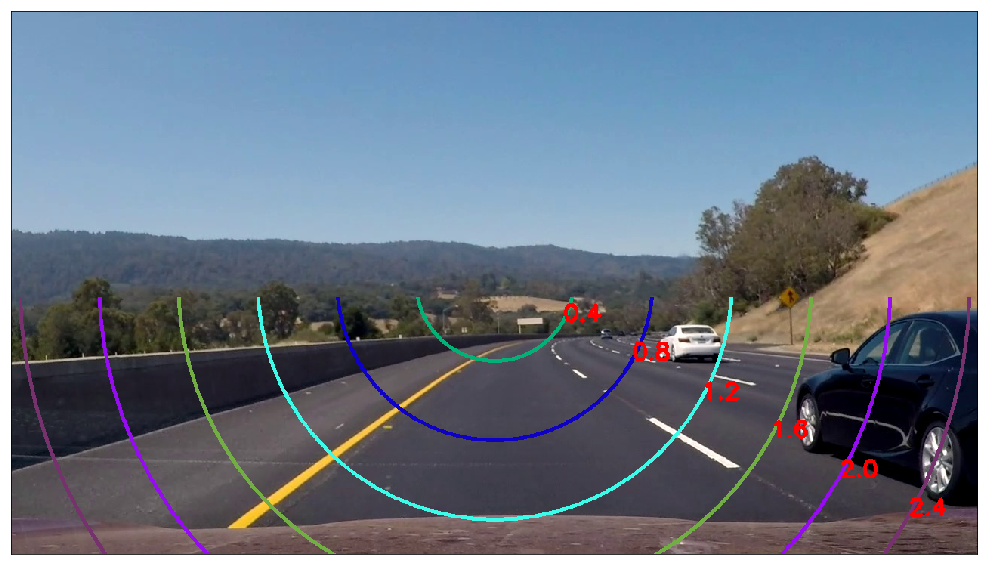

In [171]:
center = (1280/2, 720/2)
plt.figure(figsize=(20, 10))
plt.xticks([], [])
plt.yticks([], [])
out_img = np.copy(img)
x_l = np.linspace(1280/2, 1280, 7, False)
y_l = np.linspace(720/2, 720, 7, False)

for x,y in zip(x_l, y_l):
    s = xy_to_scale(x,y)
    r = xy_to_radius(x,y)
    print(s,r)
    color = np.random.randint(0, 256, (3,))
    out_img = cv2.circle(out_img, center, int(r), color, 4)
    out_img = cv2.putText(out_img, str(round(s,2)), (int(x),int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 4)
out_img[0:380, :, :] = img[0:380, :, :]
plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))

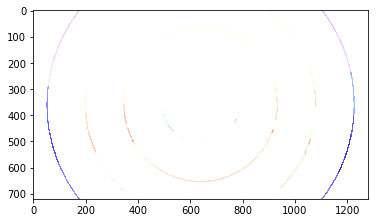

In [147]:
masked_img2 = cv2.add(out_img,img)
plt.imshow(masked_img2)

In [133]:
masked_img2.dtype

dtype('uint8')

In [151]:
s = 3.323

In [156]:
str(round(s,2))

'3.32'

In [155]:
'{}'.format(s)

'3.323'